# **Simple Linear Regression(Delivery Time - Predict delivery time using sorting time)**

### **Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

### **Importing Data**

In [ ]:
delivery_data = pd.read_csv('/content/delivery_time.csv')
delivery_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### **Understanding the Data**

In [ ]:
delivery_data.shape

(21, 2)

In [ ]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
delivery_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
delivery_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### **Renaming Columns**

In [ ]:
delivery_data = delivery_data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
delivery_data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### **Plotting the data to check for outliers**

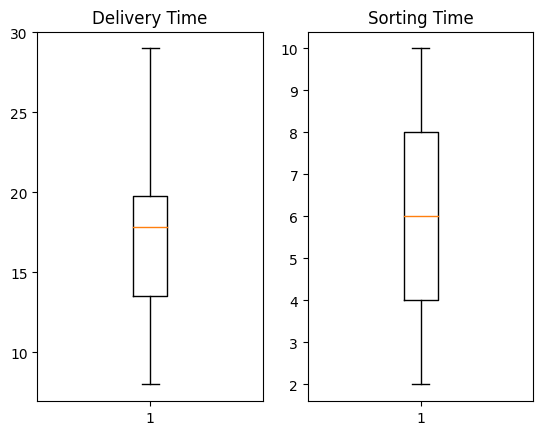

In [ ]:
plt.subplot(121)
plt.boxplot(delivery_data['Delivery_Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(delivery_data['Sorting_Time'])
plt.title('Sorting Time')
plt.show()

**As we can see there are no Outliers in the data**

### **Checking the Correlation between variables**

In [ ]:
delivery_data.corr()


,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


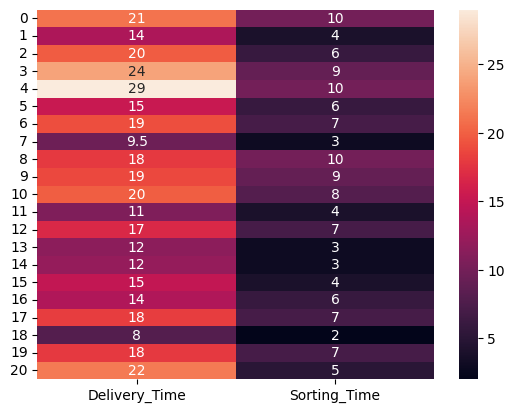

In [ ]:
sns.heatmap(data= delivery_data, annot=True)
plt.show()

### **Visualization of Correlation beteen x and y**

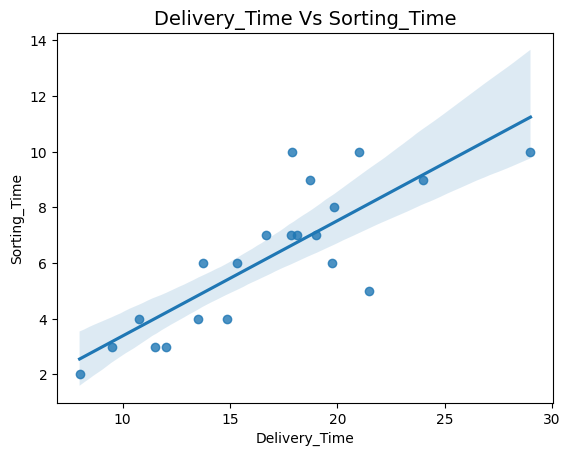

In [ ]:
sns.regplot(x='Delivery_Time', y='Sorting_Time', data= delivery_data)
plt.title('Delivery_Time Vs Sorting_Time', fontsize = 14)
plt.show()

**As we can see above there is not much good correlation between the two variable.**

### **Checking for Homoscedasticity or Hetroscedasticity**

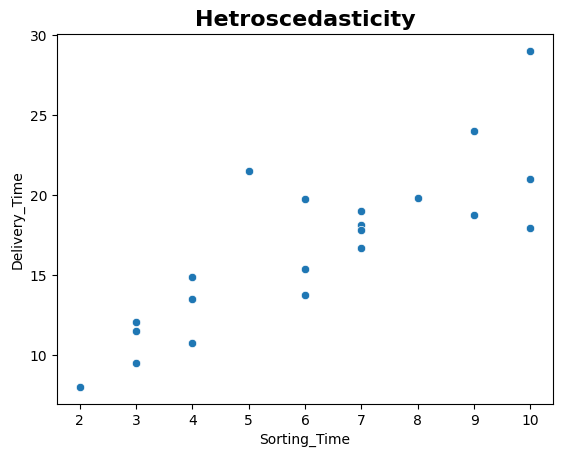

In [ ]:
sns.scatterplot(x = 'Sorting_Time', y = 'Delivery_Time', data= delivery_data)
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()


In [ ]:
delivery_data.var()


Delivery_Time    25.754619
Sorting_Time      6.461905
dtype: float64

**As we can see in above graph**
*   It shows as the Sorting Time Increases Delivery Time also increases with much variation along the way
*  The data doesn't have any specific pattern in the variation, but we can't say the variation is Hetroscedasticity.



### **Trying different transformation of data to estimate normal distribution and to remove any skewness**

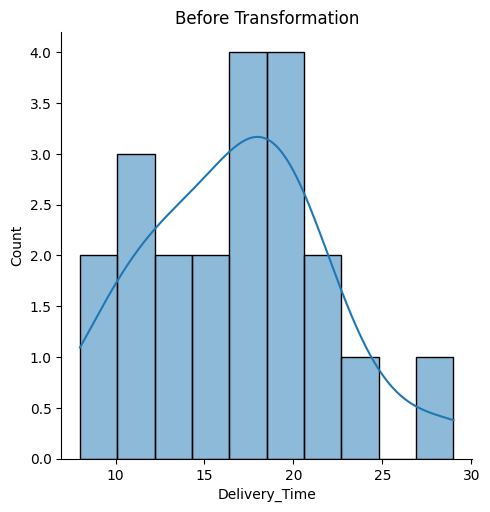

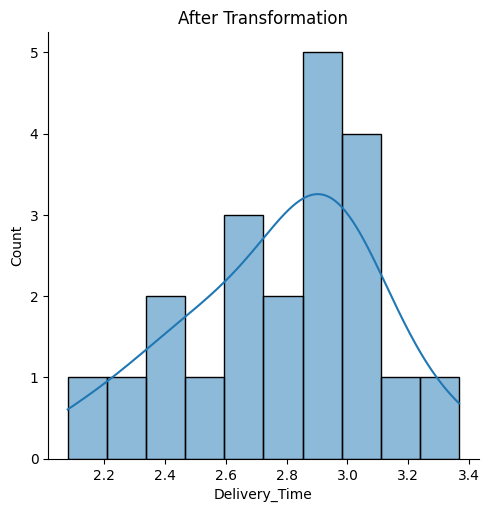

In [ ]:
sns.displot(delivery_data['Delivery_Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(delivery_data['Delivery_Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

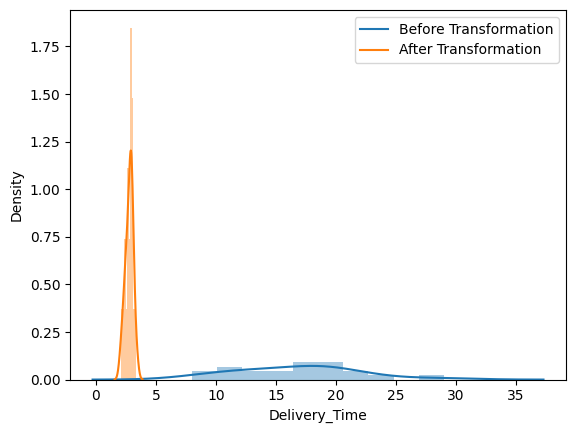

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(delivery_data['Delivery_Time'], bins = 10, kde = True)
sns.distplot(np.log(delivery_data['Delivery_Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

**As we can see how log transformation affects the data and it scales the values down.**

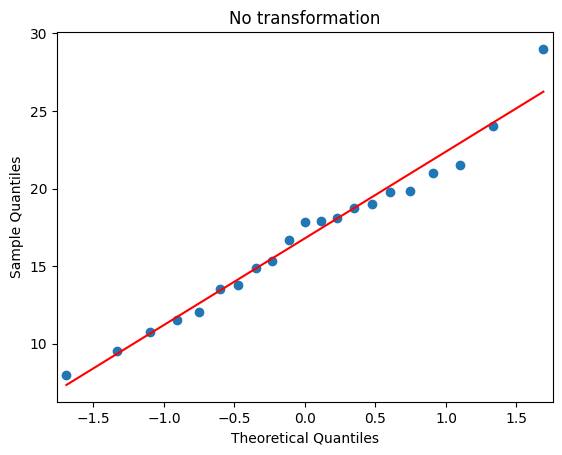

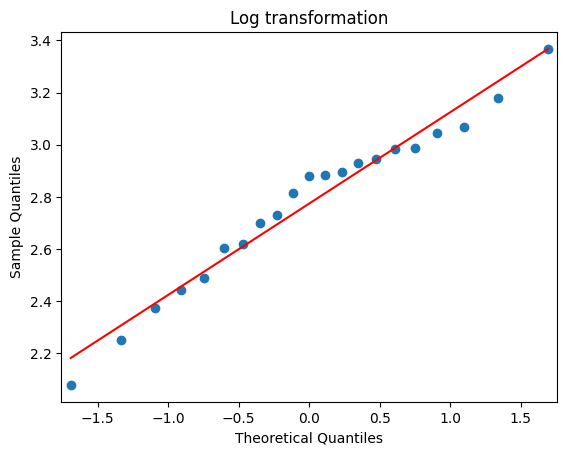

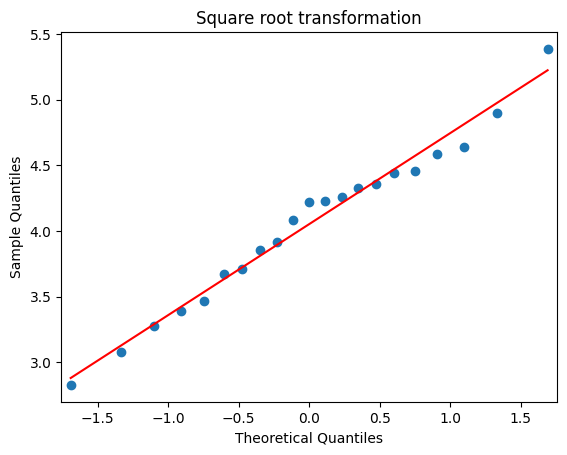

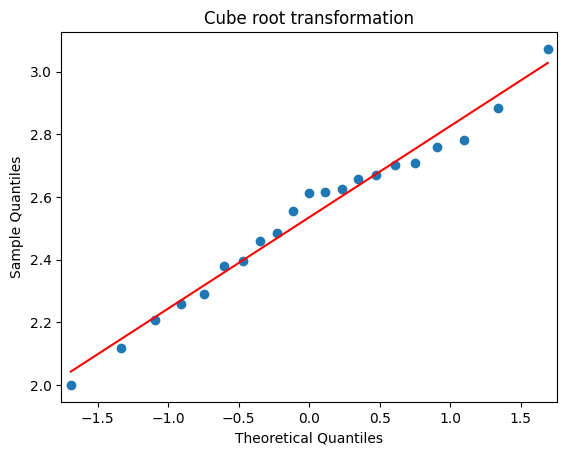

In [ ]:
sm.qqplot(delivery_data['Delivery_Time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(delivery_data['Delivery_Time']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(delivery_data['Delivery_Time']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(delivery_data['Delivery_Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

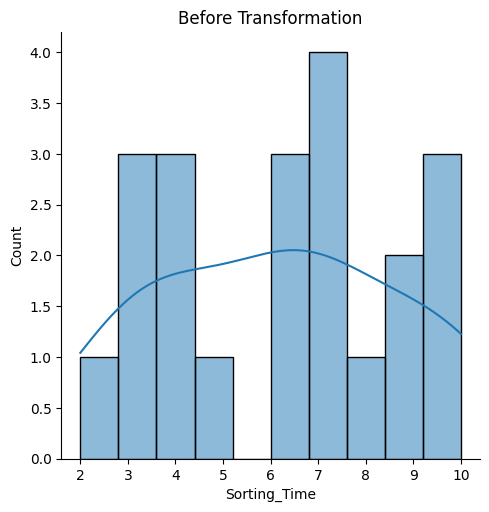

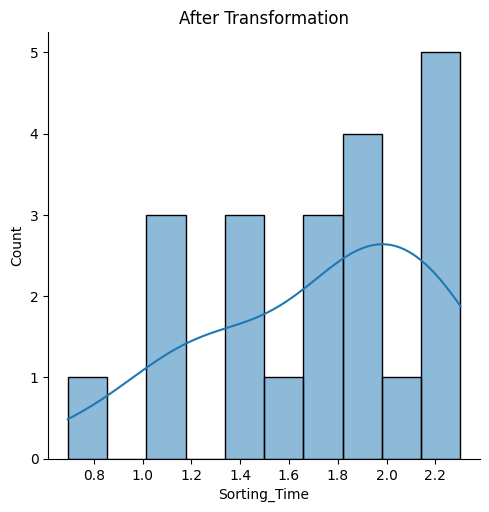

In [ ]:
sns.displot(delivery_data['Sorting_Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(delivery_data['Sorting_Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

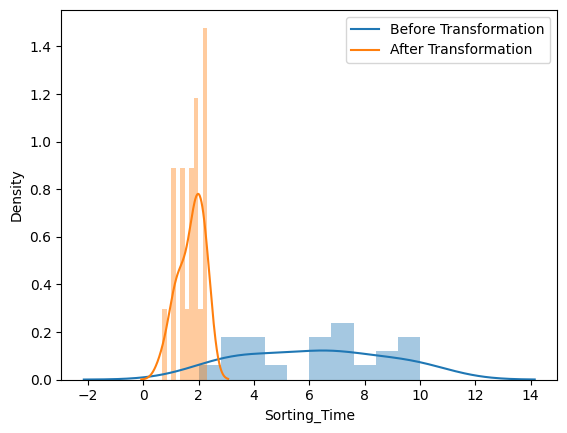

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(delivery_data['Sorting_Time'], bins = 10, kde = True)
sns.distplot(np.log(delivery_data['Sorting_Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

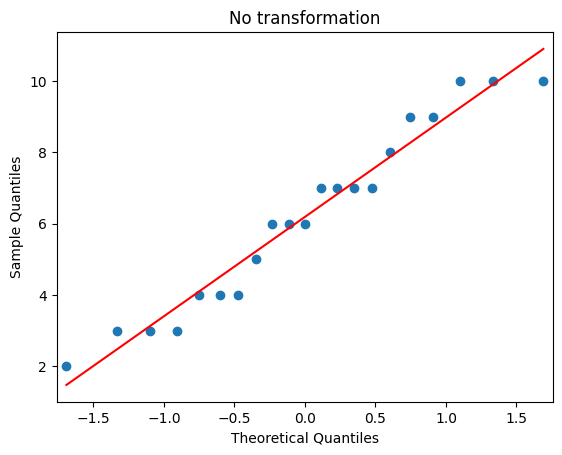

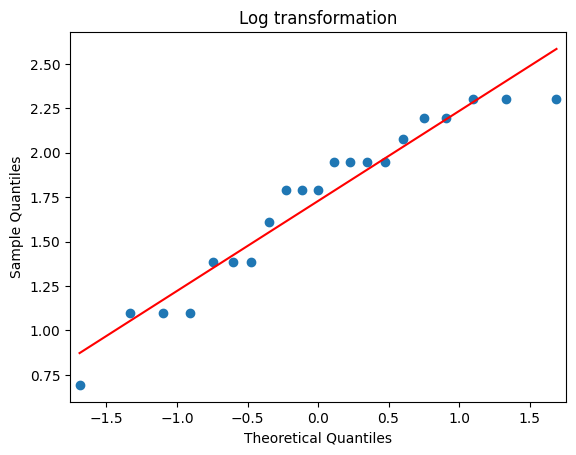

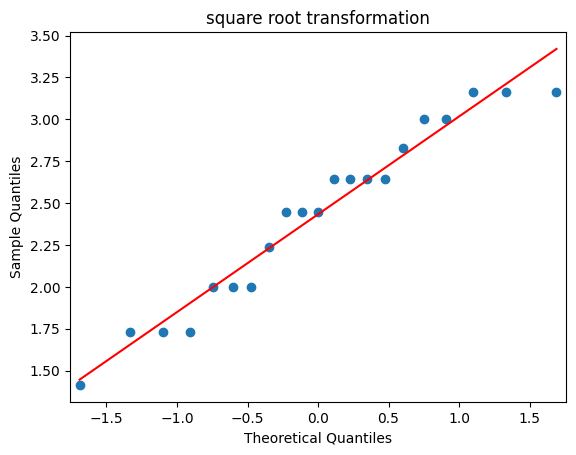

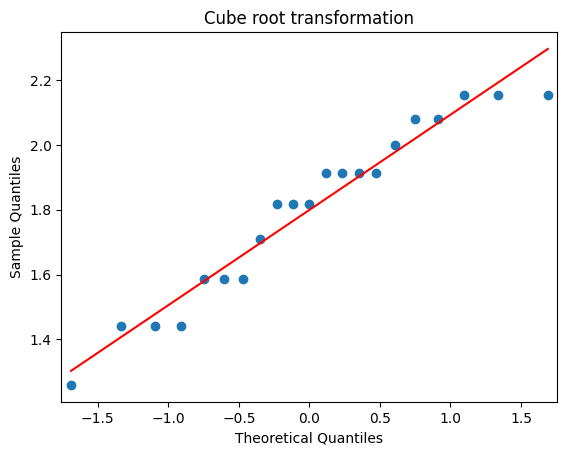

In [ ]:
sm.qqplot(delivery_data['Sorting_Time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(delivery_data['Sorting_Time']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(delivery_data['Sorting_Time']), line = 'r')
plt.title('square root transformation')
sm.qqplot(np.cbrt(delivery_data['Sorting_Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

**We only Perform any data transformation when the data is skewed or not normal distribution N(0,1)**

### **Fitting a Linear Regression Model using Ordinary Least Squares(OLS) Regression**

**It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line**

In [ ]:
linear_model = smf.ols('Delivery_Time~Sorting_Time', data = delivery_data).fit()

In [ ]:
print('R-squared     :',linear_model.rsquared.round(3)) #Overall Contribution of Predictors
print('Adj.R-squared :',linear_model.rsquared_adj.round(3)) #Overall Contribution of Predictors
print('AIC Value     :',linear_model.aic.round(3)) #Error Impurity
print('BIC Value     :',linear_model.bic.round(3)) #Error Impurity

R-squared     : 0.682
Adj.R-squared : 0.666
AIC Value     : 106.714
BIC Value     : 108.803


**As we can notice in the above model**

*   The R-squared and Adjusted R-squared scores are still below 0.85.
*  Lets Try some data transformation to check whether these scores can get any higher than this.


### **Square Root transformation on data**

In [ ]:
linear_model1 = smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = delivery_data).fit()

In [ ]:
print('R-squared     :',linear_model1.rsquared.round(3))
print('Adj.R-squared :',linear_model1.rsquared_adj.round(3))
print('AIC Value     :',linear_model1.aic.round(3))
print('BIC Value     :',linear_model1.bic.round(3))

R-squared     : 0.729
Adj.R-squared : 0.715
AIC Value     : 15.464
BIC Value     : 17.553


**As we can notice in the above model**


*   After Square Root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85.
*   Lets Try other data transformation to check whether these scores can get any higher than this.



### **Cube Root transformation on data**

In [ ]:
linear_model2 = smf.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = delivery_data).fit()

In [ ]:
print('R-squared     :',linear_model2.rsquared.round(3))
print('Adj.R-squared :',linear_model2.rsquared_adj.round(3))
print('AIC Value     :',linear_model2.aic.round(3))
print('BIC Value     :',linear_model2.bic.round(3))

R-squared     : 0.744
Adj.R-squared : 0.731
AIC Value     : -22.071
BIC Value     : -19.982


**As we can notice in the above model**


*   After Cube root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85.
*   Lets Try other data transformation to check whether these scores can get any higher than this.



### **Log transformation on data**

In [ ]:
linear_model3 = smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = delivery_data).fit()

In [ ]:
print('R-squared     :',linear_model3.rsquared.round(3))
print('Adj.R-squared :',linear_model3.rsquared_adj.round(3))
print('AIC Value     :',linear_model3.aic.round(3))
print('BIC Value     :',linear_model3.bic.round(3))

R-squared     : 0.772
Adj.R-squared : 0.76
AIC Value     : -16.581
BIC Value     : -14.492


**As we can notice in the above model**


*   After log transformation on the Data, This Model has scored the highest R-squared and Adjusted R-squared scores than the previous model
*  Yet both Adjusted R-squared and R-squared scores are still below 0.78.
*   Though it is now close to 0.80 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can stop here.


### **Model Testing**

As Y = Beta0 + Beta1*(X)

### **Finding Coefficient Parameters (Beta0 and Beta1 values)**

In [ ]:
linear_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

**Here, (Intercept) Beta0 value = 6.58 & (Sorting Time) Beta1 value = 1.64**

**Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)**

**Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)**

In [ ]:
print(linear_model.tvalues,'\n',linear_model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


**(Intercept) Beta0: tvalue=3.82 , pvalue=0.001147**

**(daily) Beta1: tvalue=6.38, pvalue=0.000004**

**As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(Sorting Time) variable has good slope and variance w.r.t Y(Delivery Time) variable.**

**R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.**

**Measure goodness-of-fit by finding rsquared values (percentage of variance)**

In [ ]:
linear_model.rsquared, linear_model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

**Determination Coefficient = rsquared value = 0.68 ; very good fit >= 85%**

### **Residual Analysis**
###  Test for Normality of Residuals(Q-Q Plot)

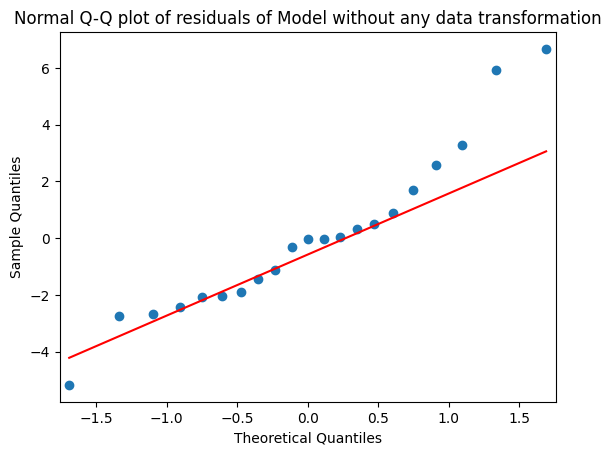

In [ ]:
sm.qqplot(linear_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

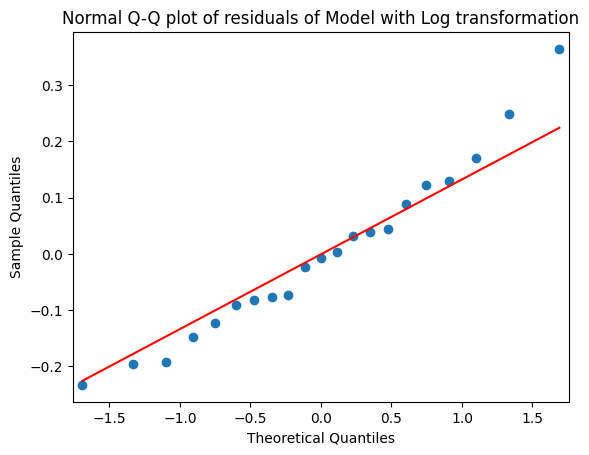

In [ ]:
sm.qqplot(linear_model3.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

**As we can notice in the above plots**


*   Both The Model have slightly different plots
*   The first model is right skewed and doesn't follow normal distribution
*   The second model after log-transformation follows normal distributon with less skewness than first model





### **Residual Plot to check Homoscedasticity or Hetroscedasticity**

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

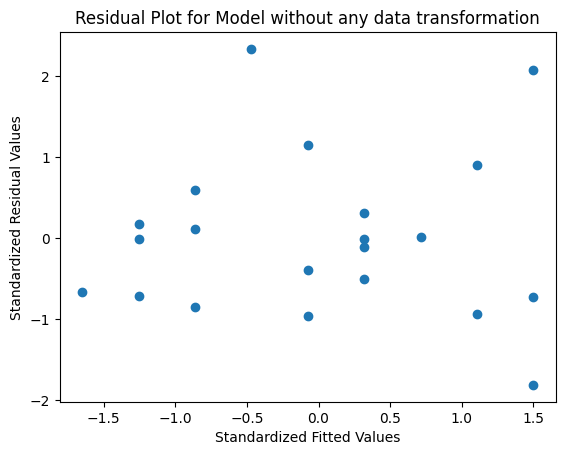

In [ ]:
plt.scatter(get_standardized_values(linear_model.fittedvalues), get_standardized_values(linear_model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

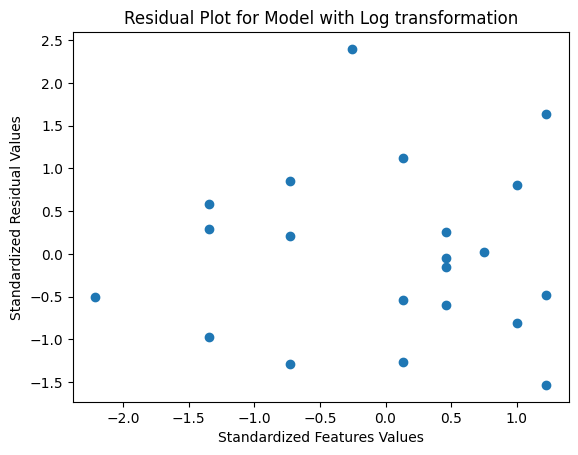

In [ ]:
plt.scatter(get_standardized_values(linear_model3.fittedvalues), get_standardized_values(linear_model3.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

**As we can notice in the above plots**

*   Both The Model have Homoscedasciticity.
*   The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.
*   Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed





### **Model Validation**

**Comparing different** **models with respect to their Root Mean Squared Errors**

**We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the** **average distance (squared** **to get rid of negative numbers) between the model’s predicted** **target value and the actual target value. **

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
linear_model1_pred_y =np.square(linear_model1.predict(delivery_data['Sorting_Time']))
linear_model2_pred_y =pow(linear_model2.predict(delivery_data['Sorting_Time']),3)
linear_model3_pred_y =np.exp(linear_model3.predict(delivery_data['Sorting_Time']))

In [ ]:
linear_model1_rmse =np.sqrt(mean_squared_error(delivery_data['Delivery_Time'], linear_model1_pred_y))
linear_model2_rmse =np.sqrt(mean_squared_error(delivery_data['Delivery_Time'], linear_model2_pred_y))
linear_model3_rmse =np.sqrt(mean_squared_error(delivery_data['Delivery_Time'], linear_model3_pred_y))
print('Linear Model =', np.sqrt(linear_model.mse_resid),'\n' 'Linear Model1=', linear_model1_rmse,'\n' 'Linear Model2=', linear_model2_rmse,'\n' 'Linear Model3=', linear_model3_rmse)

Linear Model = 2.934903768890139 
Linear Model1= 2.762294279320867 
Linear Model2= 2.755584309893576 
Linear Model3= 2.745828897614548


In [ ]:
data = {'Linear Model': np.sqrt(linear_model.mse_resid), 'Linear Model1': linear_model1_rmse, 'Linear Model2': linear_model3_rmse, 'Linear Model3' : linear_model3_rmse}
min(data, key=data.get)

'Linear Model2'

**As 'Linear Model2' has the minimum RMSE and highest Adjusted R-squared score.** **Hence, we are going to use Linear 'Linear Model2' to predict our values**

**'Linear Model2' is the model where** **we did log transformation on both dependent variable as well** **as on independent variable**

### **Predicitng from original model without any data transformation**

In [ ]:
predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = delivery_data.Sorting_Time
predicted1['Delivery_Time'] = delivery_data.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(linear_model.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


### **Predicting values from model with log transformation on the data**

In [ ]:
predicted2 = pd.DataFrame()
predicted2['Sorting_Time'] = delivery_data.Sorting_Time
predicted2['Delivery_Time'] = delivery_data.Delivery_Time
predicted2['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(linear_model2.predict(predicted2.Sorting_Time)))
predicted2

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997
5,6,15.35,12.808396
6,7,19.00,13.889274
7,3,9.50,9.328887
8,10,17.90,17.035997
9,9,18.75,15.997918
